# 2.4.5 Working With Missing And Duplicate Data

This mission will focus on handling missing and duplicate data. There are multiple reasons for missing or duplicate data like performing cleaning and transformation tasks or user input error. There are different ways to handle missing data like removing rows or colums, filling in missing values, or leaving the missing values like it is. This mission will work with the World Happiness Report data set like the previous missions, with some minor modified changes.

In [382]:
# Exploring the data sets
import pandas as pd
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')
# Getting information about the number of rows and columns of each
# data set
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [383]:
print(shape_2015)
print(shape_2016)
print(shape_2017)

(164, 13)
(164, 14)
(164, 13)


## Identifying missing values

Using the isnull() method, rows with missing values can be easily identified.

In [384]:
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


When working with bigger data sets, it will be easier to create a summary of the missing values.

In [385]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In the happiness2015 data set, all columns have six missing values except the Country and the Year column.

In [386]:
missing2016 = happiness2016.isnull().sum()
missing2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [387]:
missing2017 = happiness2017.isnull().sum()
missing2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

The 2016 and 2017 data sets show similar results. Instead of 6 missing values each column, in 2016 there are 7, and in 2017 there are 9.

## Correcting Data Cleaning Errors that Result in Missing Values

This work flow will be used to clean missing values, starting with checking for errors:
<br><br>
1. Check for errors in data cleaning/transformation
2. Use data additional sources to fill missing values
3. Drop row/column
4. Fill missing values with reasonable estimates computed from the available data

In [388]:
# Using the pd.concat() function to combine the three data sets
combined = pd.concat([happiness2015, happiness2016, happiness2017],
                    ignore_index=True)

/Users/marvinzajonz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [389]:
# Checking the combined dataframe for missing values
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

The number of missing values has increased drastically after combining the data sets with the concat() function. One reason for this is that the column names differ slightly. For example, 'Trust (Government Trust)' in one data set is 'Trust (Government.Corruption) in the other data set. As a result, column names have to be updated in order to make the combined dataframes uniform. 

In [390]:
# Updating the happiness2017 column names
happiness2017.columns = happiness2017.columns.str.replace('.',
                        ' ').str.replace('\s+', ' ').str.strip().str.upper()

In [391]:
happiness2017.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [392]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [393]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [394]:
# Updating the happiness2016 and happiness2015 column names
happiness2016.columns = happiness2016.columns.str.replace('(',
    '').str.replace(')','').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(',
    '').str.replace(')','').str.strip().str.upper()

In [395]:
happiness2016.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')

In [396]:
happiness2015.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [397]:
# Combining the three data sets with the updating column names via 
# the pd.concat() function
combined = pd.concat([happiness2015, happiness2016, happiness2017],
                    ignore_index=True)

/Users/marvinzajonz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [398]:
# Checking the newly created dataframe for missing values
missing = combined.isnull().sum()
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

## Visualizing missing data

Even after renaming the column names, there are still some missing data values, especially in the 'lower confidence interval', 'upper confidence interval', 'whisher high', and 'whisher low'. Missing values can be visualized with a heatmap and the seaborn library.

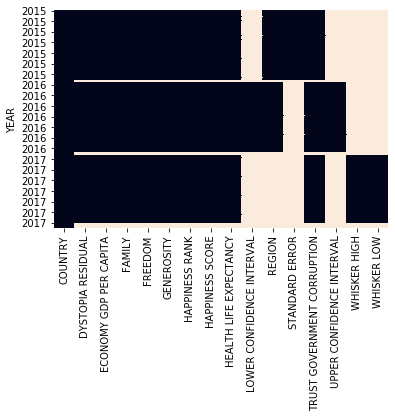

In [399]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

In the heatmap above, missing values are represented by a light colour, while all other values are black. This heatmap shows that no values are missing in the COUNTRY column, some columns only have data populated for one year, and REGION data is missing for the year 2017.

In [400]:
# Selecting the rows in combined in which the year column equals 2017
# and select just the REGION column
regions_2017 = combined["REGION"][combined["YEAR"] == 2017]
regions_2017

328    NaN
329    NaN
330    NaN
331    NaN
332    NaN
333    NaN
334    NaN
335    NaN
336    NaN
337    NaN
338    NaN
339    NaN
340    NaN
341    NaN
342    NaN
343    NaN
344    NaN
345    NaN
346    NaN
347    NaN
348    NaN
349    NaN
350    NaN
351    NaN
352    NaN
353    NaN
354    NaN
355    NaN
356    NaN
357    NaN
      ... 
462    NaN
463    NaN
464    NaN
465    NaN
466    NaN
467    NaN
468    NaN
469    NaN
470    NaN
471    NaN
472    NaN
473    NaN
474    NaN
475    NaN
476    NaN
477    NaN
478    NaN
479    NaN
480    NaN
481    NaN
482    NaN
483    NaN
484    NaN
485    NaN
486    NaN
487    NaN
488    NaN
489    NaN
490    NaN
491    NaN
Name: REGION, Length: 164, dtype: object

In [401]:
# Number of missing values in the region column for the year 2017
missing = regions_2017.isnull().sum()
missing

164

Since the data set of the year 2017 contains 164 countries, the region data for every country is missing.

## Using Data From Additional Sources to Fill in Missing Values

In order to fill in the missing region values for the 2017 data set, the information from the region columns of the two previous years can be used.

In [402]:
# Creating a dataframe for the country and corresponding region columns
# in the 2015 data set.
regions = happiness2016[['COUNTRY','REGION']]
regions.head()

,COUNTRY,REGION
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe


In [403]:
regions["REGION"].isnull().sum()

7

In [404]:
combined.shape

(492, 17)

In [405]:
# Using the pd.merge() function to assign the REGION in the regions
# dataframe to the corresponding country in combined
combined = pd.merge(left=combined, right=regions, on='COUNTRY', 
                   how='right')
combined.shape

(492, 18)

In [406]:
# Dropping the original region column
combined = combined.drop('REGION_x', axis=1)
combined.shape

(492, 17)

In [407]:
# Checking the updated combined dataframe for missing values
missing = combined.isnull().sum()
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                        21
dtype: int64

In [408]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,Switzerland,2.517380,1.39651,1.349510,0.665570,0.296780,1.0,7.587,0.941430,NaN,0.03411,0.419780,NaN,NaN,NaN,2015,Western Europe
1,Switzerland,2.694630,1.52733,1.145240,0.585570,0.280830,2.0,7.509,0.863030,7.428,NaN,0.412030,7.590,NaN,NaN,2016,Western Europe
2,Switzerland,2.276716,1.56498,1.516912,0.620071,0.290549,4.0,7.494,0.858131,NaN,NaN,0.367007,NaN,7.561772,7.426227,2017,Western Europe
3,Iceland,2.702010,1.30232,1.402230,0.628770,0.436300,2.0,7.561,0.947840,NaN,0.04884,0.141450,NaN,NaN,NaN,2015,Western Europe
4,Iceland,2.831370,1.42666,1.183260,0.566240,0.476780,3.0,7.501,0.867330,7.333,NaN,0.149750,7.669,NaN,NaN,2016,Western Europe


In [409]:
region_missing_count = combined["REGION_y"].isnull().sum()
region_missing_count

21

## Identifying Duplicates Values

In [410]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,Switzerland,2.517380,1.39651,1.349510,0.665570,0.296780,1.0,7.587,0.941430,NaN,0.03411,0.419780,NaN,NaN,NaN,2015,Western Europe
1,Switzerland,2.694630,1.52733,1.145240,0.585570,0.280830,2.0,7.509,0.863030,7.428,NaN,0.412030,7.590,NaN,NaN,2016,Western Europe
2,Switzerland,2.276716,1.56498,1.516912,0.620071,0.290549,4.0,7.494,0.858131,NaN,NaN,0.367007,NaN,7.561772,7.426227,2017,Western Europe
3,Iceland,2.702010,1.30232,1.402230,0.628770,0.436300,2.0,7.561,0.947840,NaN,0.04884,0.141450,NaN,NaN,NaN,2015,Western Europe
4,Iceland,2.831370,1.42666,1.183260,0.566240,0.476780,3.0,7.501,0.867330,7.333,NaN,0.149750,7.669,NaN,NaN,2016,Western Europe


Next, let's find out how many rows have the similar value in the country and the year column at the same time. If the data is correct, there should not be any duplicates.

In [411]:
# Checking for duplicates
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y


Using the duplicated() method shows that it seems like there are no duplicates in the data frame. However, it could be the case that no duplicates are found due to differences in the capitalization. Therefore, all the values in the COUNTRY column have to be converted into uppercase before the dataframe can be checked again.

In [412]:
# Converting all country values into uppercase
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined['COUNTRY'].head()

0    SWITZERLAND
1    SWITZERLAND
2    SWITZERLAND
3        ICELAND
4        ICELAND
Name: COUNTRY, dtype: object

In [413]:
# Checking for duplicates
dups = combined.duplicated(['COUNTRY','YEAR'])
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
486,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
487,SOMALILAND REGION,2.43801,0.25558,0.75862,0.3913,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


The result shows that there are three duplicate rows. 

## Correcting Duplicates Values

In [414]:
# Inspecting all the rows for SOMALILAND REGION in combined
combined[combined['COUNTRY']=='SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
270,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,NaN
271,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN
272,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN
486,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
487,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


There are two rows for each year. Duplicate rows can be removed with the drop_duplicates() method.

In [415]:
combined.shape

(492, 17)

In [416]:
# Dropping duplicates
combined = combined.drop_duplicates(["COUNTRY","YEAR"])

In [417]:
combined.shape

(489, 17)

## Handling missing values by dropping columns

In [418]:
# Checking how many missing values are now left
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               20
ECONOMY GDP PER CAPITA          20
FAMILY                          20
FREEDOM                         20
GENEROSITY                      20
HAPPINESS RANK                  20
HAPPINESS SCORE                 20
HEALTH LIFE EXPECTANCY          20
LOWER CONFIDENCE INTERVAL      333
STANDARD ERROR                 331
TRUST GOVERNMENT CORRUPTION     20
UPPER CONFIDENCE INTERVAL      333
WHISKER HIGH                   334
WHISKER LOW                    334
YEAR                             0
REGION_y                        21
dtype: int64

5 columns have a count of over 300 missing values. Since that is more than half of the rows and the columns do not really over any insights when it comes to analyzing the happiness score, they can be dropped.

In [419]:
# Using the drop() method to drop the columns.
combined = combined.drop(["LOWER CONFIDENCE INTERVAL", "STANDARD ERROR",
                         "UPPER CONFIDENCE INTERVAL", "WHISKER HIGH",
                         "WHISKER LOW"], axis=1)
# Checking for missing values
missing = combined.isnull().sum()

In [420]:
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              20
ECONOMY GDP PER CAPITA         20
FAMILY                         20
FREEDOM                        20
GENEROSITY                     20
HAPPINESS RANK                 20
HAPPINESS SCORE                20
HEALTH LIFE EXPECTANCY         20
TRUST GOVERNMENT CORRUPTION    20
YEAR                            0
REGION_y                       21
dtype: int64

In [421]:
# Checking the number of values that are not missing
combined.notnull().sum()

COUNTRY                        489
DYSTOPIA RESIDUAL              469
ECONOMY GDP PER CAPITA         469
FAMILY                         469
FREEDOM                        469
GENEROSITY                     469
HAPPINESS RANK                 469
HAPPINESS SCORE                469
HEALTH LIFE EXPECTANCY         469
TRUST GOVERNMENT CORRUPTION    469
YEAR                           489
REGION_y                       468
dtype: int64

Instead of naming every single column that has to be dropped like in the above code, the dropna() method can be used. Taking advantage of the thresh argument, columns will only be dropped if the number of values in that column is below the thresh argument.

In [424]:
# Dropping all columns that have 159 or less values
combined = combined.dropna(thresh=159, axis=1)

## Analyzing missing data

In [425]:
combined.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              20
ECONOMY GDP PER CAPITA         20
FAMILY                         20
FREEDOM                        20
GENEROSITY                     20
HAPPINESS RANK                 20
HAPPINESS SCORE                20
HEALTH LIFE EXPECTANCY         20
TRUST GOVERNMENT CORRUPTION    20
YEAR                            0
REGION_y                       21
dtype: int64

In order to make a decision on how to handle the remaining missing data, it can be beneficial to analyze if it is better to just drop the rows or replace the missing values with other values. 
<br> 
In the code above it becomes clear that the missing valye only accounts for a small portion of the dataframe, which has 489 rows. It seems like dropping the rows would not have a significant impact on the analysis. 

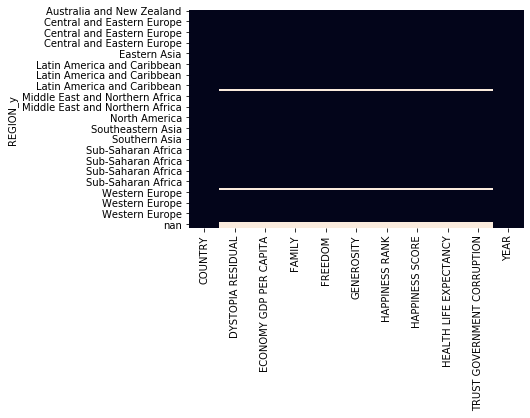

In [427]:
# Setting the index to Region and sorting the data
sorted = combined.set_index('REGION_y')
sorted = sorted.sort_values(['REGION_y', 'HAPPINESS SCORE'])
# Visualizing the missing data
sns.heatmap(sorted.isnull(), cbar=False)

The heatmap above shows that dropping an entire row would not lead to the loss of valuable information, since often times the entire row is missing data.

## Handling missing values with imputation

Since the missing data is in columns with numeric data types, the missing values can be filled in by the mean value of each column using the fillna() method.

In [431]:
# Calculating the mean value of the happiness score column
happiness_mean = combined["HAPPINESS SCORE"].mean()
happiness_mean

5.371396588795226

In [433]:
# Using the filna() method to replace all the missing values with
# the mean value
combined["HAPPINESS SCORE UPDATED"] = combined["HAPPINESS SCORE"].fillna(happiness_mean)
combined["HAPPINESS SCORE UPDATED"].mean()

5.371396588795223

Using the fillna() method to replace missing values did not affect the mean value of the entire column.

## Dropping rows

Sometimes using the mean value of a column is not always the best idea. In this data set, most of the missing values belong to the sub-saharan region in Africa and can be contributed to war or natural disasters. Therefore, instead of replacing the missing values with the mean value, dropping each row would be a better way for a more accurate analysis down the line.

In [434]:
# Dropping rows with missing values
combined = combined.dropna()
missing = combined.isnull().sum()

In [435]:
missing

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION_y                       0
HAPPINESS SCORE UPDATED        0
dtype: int64

There are no more missing values in the dataframe.

## Conclusion

In this mission I became more familiar with the basic workflow of data cleaning. In addition, I learned more defined steps of the data cleaning workflow, like:
- Setting a goal for the projec
- Researching and understanding the data
- Determining what data is needed to complete the analysis
- Adding columns
- Cleaning specific data types
- Combining data sets
- Removing duplicate values
- Handling missing values